In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from psych_metric.datasets.pa.dataset import PA, PA_sequence
from psych_metric.metrics.volcano.metric import VolcanoMetricMultinomialEM, VolcanoMetricMultinomialMC

/home/mel/anaconda3/envs/metric_py3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/mel/anaconda3/envs/metric_py3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
N = 6

# Get clusters

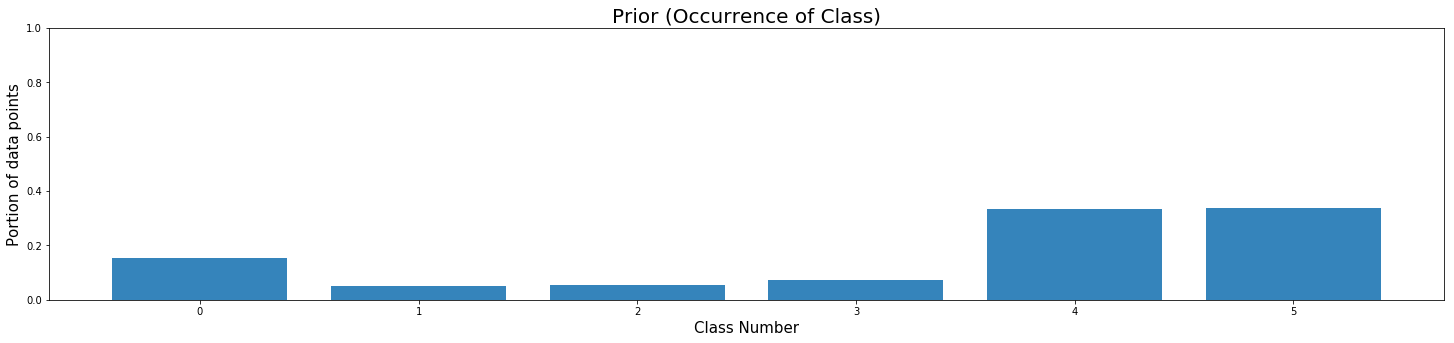

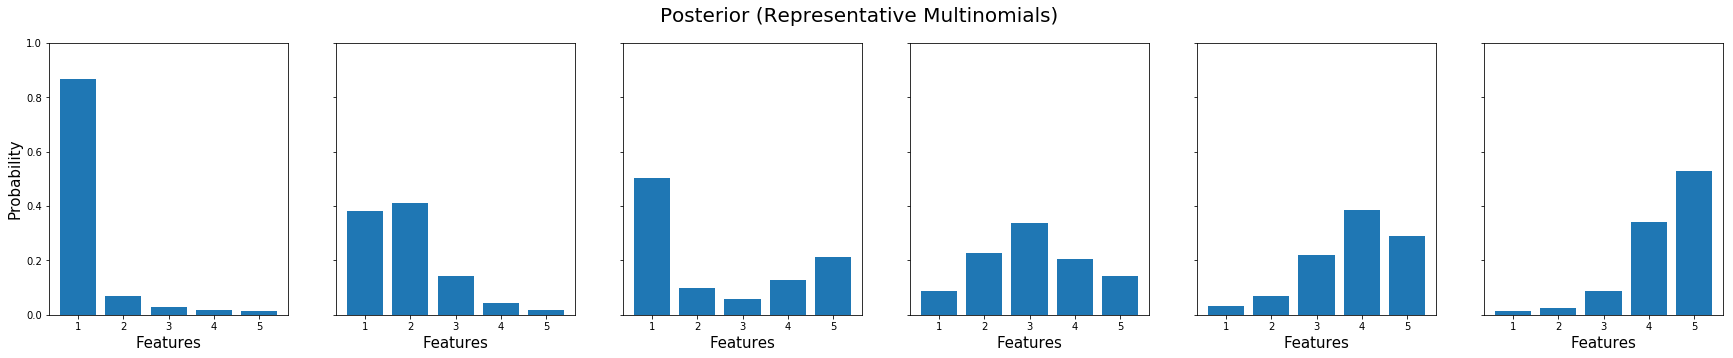

In [4]:
ds = PA(dataset='3')
X = ds.get_multinomial_array()
Metric = VolcanoMetricMultinomialEM(n_classes=N)
Metric.train(X, verbose=False)
Metric.plot_prior()
Metric.plot_posterior()

# Calculate Transitions

In [6]:
df = PA_sequence(dataset='3', date='090618').df
# TODO: get unique gif annotations to be counted only once
df = df[df['length'] > 3]

In [7]:
def count_transitions(classes):
    t = np.zeros((N,N))
    for i in range(len(classes)-1):
        t[classes[i], classes[i+1]] += 1
    return t

In [8]:
df['class'] = df['multinomials'].map(Metric.predict)
df['transitions'] = df['class'].map(count_transitions)

In [9]:
transitions = np.sum(df['transitions'])

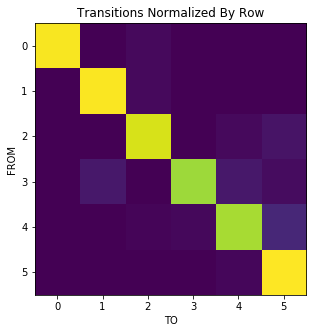

[[ 37.   0.   1.   0.   0.   0.]
 [  0.  41.   1.   0.   0.   0.]
 [  0.   0.  36.   0.   1.   2.]
 [  0.   2.   0.  26.   2.   1.]
 [  0.   0.   2.   3. 115.  15.]
 [  0.   0.   1.   0.   7. 437.]]


In [10]:
fig = plt.figure(figsize=(5,5))
plt.imshow(transitions / np.sum(transitions, axis=1, keepdims=True))
plt.ylabel('FROM')
plt.xlabel('TO')
plt.title('Transitions Normalized By Row')
plt.show()
print(transitions)